In [72]:
reset -fs

In [73]:
from datetime import date, datetime, timedelta, time
import pandas as pd
import numpy as np

In [74]:
df = pd.read_csv("data/yellow_tripdata_2019-06.csv", parse_dates=["tpep_pickup_datetime", "tpep_dropoff_datetime"])

In [75]:
df = df[["tpep_pickup_datetime", "tpep_dropoff_datetime", "trip_distance", "passenger_count", "PULocationID", "DOLocationID"]]

In [76]:
# zones lookup table for Borough and Zone name against ID
zones = pd.read_csv('taxiZoneLookup.csv')#, index_col="LocationID")
#zones.index = zones.index.astype(str)

In [77]:
df = df[df.trip_distance < 100]

In [78]:
df = df[df.passenger_count != 0]

In [79]:
df

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,passenger_count,PULocationID,DOLocationID
0,2019-06-01 00:55:13,2019-06-01 00:56:17,0.00,1,145,145
1,2019-06-01 00:06:31,2019-06-01 00:06:52,0.00,1,262,263
2,2019-06-01 00:17:05,2019-06-01 00:36:38,4.40,1,74,7
4,2019-06-01 00:03:25,2019-06-01 00:15:42,1.70,1,113,148
5,2019-06-01 00:28:31,2019-06-01 00:39:23,1.60,2,79,125
...,...,...,...,...,...,...
6941019,2019-06-30 23:23:03,2019-06-30 23:39:48,0.90,1,68,158
6941020,2019-06-30 23:50:22,2019-06-30 23:57:01,0.50,1,246,90
6941021,2019-06-30 23:58:32,2019-07-01 00:00:42,0.20,1,90,186
6941022,2019-06-30 23:23:10,2019-06-30 23:30:45,1.38,1,140,163


In [80]:
df["trip_duration"] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]

In [81]:
df = df[(df.trip_duration > timedelta(minutes=1)) & (df.trip_duration < timedelta(hours=2))]

In [82]:
df.rename(columns={"PULocationID": "LocationID"}, inplace=True)
df = pd.merge(df, zones[["LocationID", "Borough"]], on="LocationID", how="left")
df = pd.merge(df, zones[["LocationID", "Zone"]], on="LocationID", how="left")
df.rename(columns={"LocationID": "PULocationID", "Borough": "PUBorough", "Zone": "PUZone"}, inplace=True)

C:\Users\johan\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [83]:
df.rename(columns={"DOLocationID": "LocationID"}, inplace=True)
df = pd.merge(df, zones[["LocationID", "Borough"]], on="LocationID", how="left")
df = pd.merge(df, zones[["LocationID", "Zone"]], on="LocationID", how="left")
df.rename(columns={"LocationID": "DOLocationID", "Borough": "DOBorough", "Zone": "DOZone"}, inplace=True)

In [84]:
df

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,passenger_count,PULocationID,DOLocationID,trip_duration,PUBorough,PUZone,DOBorough,DOZone
0,2019-06-01 00:55:13,2019-06-01 00:56:17,0.00,1,145,145,00:01:04,Queens,Long Island City/Hunters Point,Queens,Long Island City/Hunters Point
1,2019-06-01 00:17:05,2019-06-01 00:36:38,4.40,1,74,7,00:19:33,Manhattan,East Harlem North,Queens,Astoria
2,2019-06-01 00:03:25,2019-06-01 00:15:42,1.70,1,113,148,00:12:17,Manhattan,Greenwich Village North,Manhattan,Lower East Side
3,2019-06-01 00:28:31,2019-06-01 00:39:23,1.60,2,79,125,00:10:52,Manhattan,East Village,Manhattan,Hudson Sq
4,2019-06-01 00:46:46,2019-06-01 00:50:55,0.60,4,211,148,00:04:09,Manhattan,SoHo,Manhattan,Lower East Side
...,...,...,...,...,...,...,...,...,...,...,...
6720063,2019-06-30 23:23:03,2019-06-30 23:39:48,0.90,1,68,158,00:16:45,Manhattan,East Chelsea,Manhattan,Meatpacking/West Village West
6720064,2019-06-30 23:50:22,2019-06-30 23:57:01,0.50,1,246,90,00:06:39,Manhattan,West Chelsea/Hudson Yards,Manhattan,Flatiron
6720065,2019-06-30 23:58:32,2019-07-01 00:00:42,0.20,1,90,186,00:02:10,Manhattan,Flatiron,Manhattan,Penn Station/Madison Sq West
6720066,2019-06-30 23:23:10,2019-06-30 23:30:45,1.38,1,140,163,00:07:35,Manhattan,Lenox Hill East,Manhattan,Midtown North


In [85]:
boroughs = ["Manhattan"]
df = df[df.PUBorough.isin(boroughs) & df.DOBorough.isin(boroughs)]

In [86]:
df = df[["tpep_pickup_datetime", "tpep_dropoff_datetime", "PULocationID", "DOLocationID"]]

In [87]:
df

,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID
2,2019-06-01 00:03:25,2019-06-01 00:15:42,113,148
3,2019-06-01 00:28:31,2019-06-01 00:39:23,79,125
4,2019-06-01 00:46:46,2019-06-01 00:50:55,211,148
5,2019-06-01 00:54:49,2019-06-01 01:02:57,79,249
6,2019-06-01 00:09:57,2019-06-01 00:25:54,158,68
...,...,...,...,...
6720063,2019-06-30 23:23:03,2019-06-30 23:39:48,68,158
6720064,2019-06-30 23:50:22,2019-06-30 23:57:01,246,90
6720065,2019-06-30 23:58:32,2019-07-01 00:00:42,90,186
6720066,2019-06-30 23:23:10,2019-06-30 23:30:45,140,163


In [88]:
df["tpep_pickup_datetime"] = df["tpep_pickup_datetime"].apply(lambda x: x - timedelta(minutes=x.minute % 60, seconds=x.second))
#df["tpep_dropoff_datetime"] = df["tpep_dropoff_datetime"].apply(lambda x: x - timedelta(minutes=x.minute % 60, seconds=x.second))

In [89]:
puDf = df[["tpep_pickup_datetime", "PULocationID", "DOLocationID"]]

In [90]:
puDf

,tpep_pickup_datetime,PULocationID,DOLocationID
2,2019-06-01 00:00:00,113,148
3,2019-06-01 00:00:00,79,125
4,2019-06-01 00:00:00,211,148
5,2019-06-01 00:00:00,79,249
6,2019-06-01 00:00:00,158,68
...,...,...,...
6720063,2019-06-30 23:00:00,68,158
6720064,2019-06-30 23:00:00,246,90
6720065,2019-06-30 23:00:00,90,186
6720066,2019-06-30 23:00:00,140,163


In [13]:
df["from_to"] = df.PUBorough + "-" + df.DOBorough

In [214]:
df.groupby("from_to").count()["tpep_pickup_datetime"]

from_to
Brooklyn-Brooklyn        49291
Brooklyn-Manhattan       24533
Brooklyn-Queens           5352
Manhattan-Brooklyn      165875
Manhattan-Manhattan    5653167
Manhattan-Queens        218873
Queens-Brooklyn          63141
Queens-Manhattan        258705
Queens-Queens           141601
Name: tpep_pickup_datetime, dtype: int64

In [215]:
topPU = df.groupby(["PULocationID"]).count()["tpep_pickup_datetime"].sort_values(ascending=False)[:30]

In [216]:
topDO = df.groupby(["DOLocationID"]).count()["tpep_pickup_datetime"].sort_values(ascending=False)[:30]

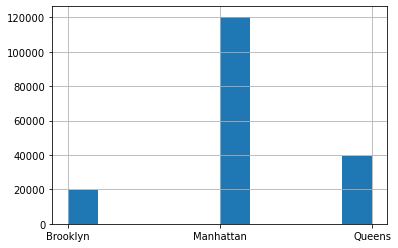

In [217]:
df[df.PUZone=="LaGuardia Airport"].DOBorough.hist()

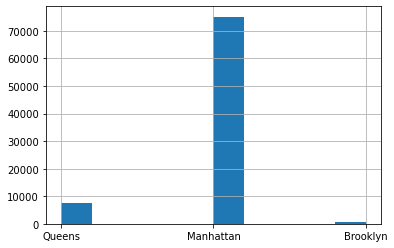

In [218]:
df[df.DOZone=="LaGuardia Airport"].PUBorough.hist()

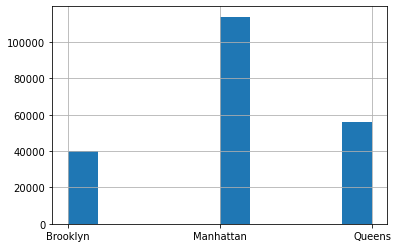

In [219]:
df[df.PUZone=="JFK Airport"].DOBorough.hist()

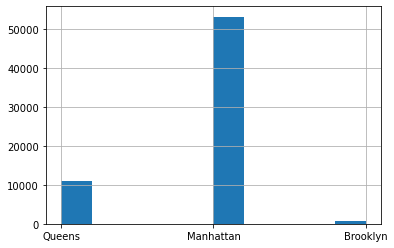

In [220]:
df[df.DOZone=="JFK Airport"].PUBorough.hist()

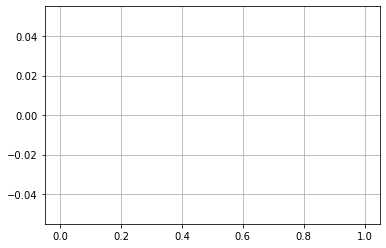

In [221]:
df[df.PUZone=="Newark Airport"].DOBorough.hist()

In [223]:
fromAirport = df[(df.PUZone=="JFK Airport") | (df.PUZone=="LaGuardia Airport")]

In [225]:
toAirport = df[(df.DOZone=="JFK Airport") | (df.DOZone=="LaGuardia Airport")]

In [229]:
jfkTest = fromAirport[fromAirport.PUZone == "JFK Airport"]

In [233]:
jfkTest = jfkTest[["tpep_dropoff_datetime", "DOLocationID", "DOBorough"]]

In [234]:
jfkTest["time_bin"] = jfkTest["tpep_dropoff_datetime"].apply(lambda x: x - timedelta(minutes=x.minute % 15, seconds=x.second))

In [236]:
jfkTest = jfkTest.drop(columns=["tpep_dropoff_datetime", "DOLocationID"])

In [239]:
jfkTest1 = pd.concat([jfkTest, pd.get_dummies(jfkTest.DOBorough)], axis=1)

In [242]:
jfkTest2 = jfkTest1.groupby("time_bin").sum()
jfkTest2

,Brooklyn,Manhattan,Queens
time_bin,,,
2008-12-31 23:15:00,0,0,1
2019-05-31 22:00:00,0,0,1
2019-06-01 00:00:00,0,0,10
2019-06-01 00:15:00,2,2,18
2019-06-01 00:30:00,14,20,25
...,...,...,...
2019-07-01 00:15:00,25,63,8
2019-07-01 00:30:00,6,12,0
2019-07-01 00:45:00,1,2,0


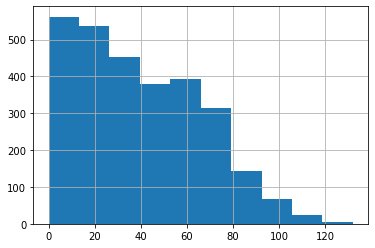

In [266]:
jfkTest2.Manhattan.hist()

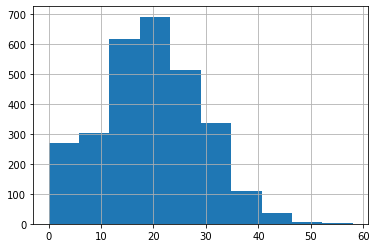

In [267]:
jfkTest2.Queens.hist()

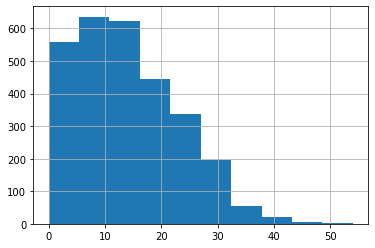

In [268]:
jfkTest2.Brooklyn.hist()

In [252]:
jfkTest2.corr().Brooklyn.sort_values(ascending=False)

Brooklyn     1.000000
Manhattan    0.797699
Queens       0.687030
Name: Brooklyn, dtype: float64

In [16]:
df = df[["tpep_dropoff_datetime", "DOLocationID", "DOBorough"]]

In [17]:
df

,tpep_dropoff_datetime,DOLocationID,DOBorough
0,2019-06-01 00:56:17,145,Queens
1,2019-06-01 00:36:38,7,Queens
2,2019-06-01 00:15:42,148,Manhattan
3,2019-06-01 00:39:23,125,Manhattan
4,2019-06-01 00:50:55,148,Manhattan
...,...,...,...
6720063,2019-06-30 23:39:48,158,Manhattan
6720064,2019-06-30 23:57:01,90,Manhattan
6720065,2019-07-01 00:00:42,186,Manhattan
6720066,2019-06-30 23:30:45,163,Manhattan


In [18]:
df["time_bin"] = df["tpep_dropoff_datetime"].apply(lambda x: x - timedelta(minutes=x.minute % 15, seconds=x.second))

<ipython-input-18-773d5b494f34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time_bin"] = df["tpep_dropoff_datetime"].apply(lambda x: x - timedelta(minutes=x.minute % 15, seconds=x.second))


In [20]:
df = df.drop(columns=["tpep_dropoff_datetime", "DOBorough"])

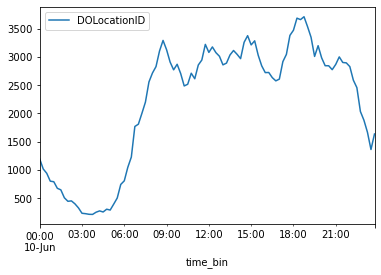

In [35]:
df.groupby("time_bin").count()["2019-6-10"].plot()

In [23]:
df.time

,DOLocationID,time_bin
0,145,2019-06-01 00:45:00
1,7,2019-06-01 00:30:00
2,148,2019-06-01 00:15:00
3,125,2019-06-01 00:30:00
4,148,2019-06-01 00:45:00
...,...,...
6720063,158,2019-06-30 23:30:00
6720064,90,2019-06-30 23:45:00
6720065,186,2019-07-01 00:00:00
6720066,163,2019-06-30 23:30:00
